In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 분석 시 참고사항
1. Train Set과 Test Set 동시에 있는 상품코드(총 train 상품 2042개 중 25개)
\
\[201956, 200876, 201501, 200556, 200489, 202484, 201036, 202239, 200071, 202426, 
 200615, 200613, 200614, 200612, 201634, 200150, 200149, 202034, 202037, 201964, 
 201979, 201976, 201572, 201025 ]

2. 


### Data Import

In [3]:
d_train_shop = pd.read_excel('D:/빅데이터 양성과정/Final project/data/rawdata_train/train_shopping.xlsx', 
                             header=0,
                             names = ['date',# 방송일시
                                      'duration', # 노출(분)
                                      'm_code', # 마더코드
                                      'p_code', # 상품코드
                                      'p_name', # 상품명
                                      'p_category', #상품군
                                      'p_price', # 판매단가
                                      'tot_price'] # 취급액 
                            )
d_train_shop.head(10)

,date,duration,m_code,p_code,p_name,p_category,p_price,tot_price
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
5,2019-01-01 06:40:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0
6,2019-01-01 07:00:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0
7,2019-01-01 07:20:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0
8,2019-01-01 07:40:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,25370000.0
9,2019-01-01 08:00:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000.0


In [4]:
d_train_tv = pd.read_excel('D:/빅데이터 양성과정/Final project/data/rawdata_train/train_tv.xlsx',
                           header = 0)
d_train_tv.head(10)

,시간대,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,...,2019-12-23,2019-12-24,2019-12-25,2019-12-26,2019-12-27,2019-12-28,2019-12-29,2019-12-30,2019-12-31,2019-01-01 to 2019-12-31
0,02:00,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.003
1,02:01,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.012,0.003
2,02:02,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.004
3,02:03,0.000,0.0,0.014,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
4,02:04,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
5,02:05,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.004
6,02:06,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.003
7,02:07,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.003
8,02:08,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.003
9,02:09,0.014,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.017,0.0,0.0,0.0,0.0,0.0,0.000,0.003


- 의문점 1 : 시청률 데이터 왜준거지? 예측변수는 아닌거같은데,, 나중에 확인해보기

### Data Pre-processing

In [5]:
df1 = d_train_shop.copy()
df1.info() # 38309 rows, 8 coloumns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        38309 non-null  datetime64[ns]
 1   duration    21525 non-null  float64       
 2   m_code      38309 non-null  int64         
 3   p_code      38309 non-null  int64         
 4   p_name      38309 non-null  object        
 5   p_category  38309 non-null  object        
 6   p_price     38309 non-null  int64         
 7   tot_price   37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


#### 전처리1.  판매가(p_price) 없는 무형상품 제거하기

In [6]:
df2 = df1[df1.p_price != 0] # 자동으로 -이 0으로 채워지기 때문에 0인 값 삭제

# print(df1[df1.p_price == 0]) # df1에서는 가격이 0인 항목들이 있었음
print(df2[df2.p_price == 0], '\n') # df2에서는 가격이 0인 항목 지워진 것을 확인할 수 있다.
df2.info()

Empty DataFrame
Columns: [date, duration, m_code, p_code, p_name, p_category, p_price, tot_price]
Index: [] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        37372 non-null  datetime64[ns]
 1   duration    20588 non-null  float64       
 2   m_code      37372 non-null  int64         
 3   p_code      37372 non-null  int64         
 4   p_name      37372 non-null  object        
 5   p_category  37372 non-null  object        
 6   p_price     37372 non-null  int64         
 7   tot_price   37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.6+ MB


- date에서 날짜, 요일, 시간, 분 분리하기

In [45]:
df2['p_date'] = df2['date'].dt.date # yyyy-mm-dd(문자), 상품구매일
df2['p_month'] = df2['date'].dt.month 
df2['p_day'] = df2['date'].dt.day 
df2['p_hour'] = df2['date'].dt.hour
df2['p_min'] = df2['date'].dt.minute
df2['p_time'] = df2['date'].dt.time
df2['p_wkday'] = df2['date'].dt.dayofweek

C:\Users\tjoeun\.conda\envs\env_cpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tjoeun\.conda\envs\env_cpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tjoeun\.conda\envs\env_cpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [48]:
df2.head(10)

,date,duration,m_code,p_code,p_name,p_category,p_price,tot_price,p_date,p_month,p_day,p_hour,p_min,p_time,p_wkday
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,1,1,6,0,06:00:00,1
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01,1,1,6,0,06:00:00,1
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01,1,1,6,20,06:20:00,1
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01,1,1,6,20,06:20:00,1
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01,1,1,6,40,06:40:00,1
5,2019-01-01 06:40:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0,2019-01-01,1,1,6,40,06:40:00,1
6,2019-01-01 07:00:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0,2019-01-01,1,1,7,0,07:00:00,1
7,2019-01-01 07:20:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0,2019-01-01,1,1,7,20,07:20:00,1
8,2019-01-01 07:40:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,25370000.0,2019-01-01,1,1,7,40,07:40:00,1
9,2019-01-01 08:00:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000.0,2019-01-01,1,1,8,0,08:00:00,1


p_wkday = 1 : 화요일, 2 : 수요일, 3 : 목요일, 4 :금요일, 5 : 토요일. 6: 일요일 , 0: 월요일

#### 전처리 2. 방송시간(duration) 결측치 처리하기
같은 방송 내에서 여러가지 상품을 파는경우 또는 같은 상품이지만 옵션선택에 따라 상품명이 달라지는 경우에는 방송시간을 맨 처음 row에만 입력하였다. 즉, date가 같고 상품의 m_code는 같고 p_code만 다른경우 duration=NaN이다.   
-> 같은날짜, 같은시간, 마더코드가 같으면 데이터상에 입력되어 있는 방송시간으로 NaN 대체

In [74]:
df3 = df2.copy()
# 방송시간 결측치 확인
df3.duration.isnull()

0        False
1         True
2        False
3         True
4        False
         ...  
38299     True
38300    False
38301     True
38302     True
38303     True
Name: duration, Length: 37372, dtype: bool

In [76]:
df3['duration'] = df3['duration'].fillna(method='ffill')
df3.tail(60)

,date,duration,m_code,p_code,p_name,p_category,p_price,tot_price,p_date,p_month,p_day,p_hour,p_min,p_time,p_wkday
38240,2019-12-31 13:00:00,20.0,100837,202480,일시불 쿠쿠전기밥솥 10인용 (QS),주방,208000,28898000.0,2019-12-31,12,31,13,0,13:00:00,1
38241,2019-12-31 13:00:00,20.0,100837,202470,무이자 쿠쿠전기밥솥 6인용(QS),주방,208000,5527000.0,2019-12-31,12,31,13,0,13:00:00,1
38242,2019-12-31 13:00:00,20.0,100837,202473,일시불 쿠쿠전기밥솥 6인용(QS),주방,198000,11220000.0,2019-12-31,12,31,13,0,13:00:00,1
38244,2019-12-31 14:20:00,20.0,100378,201235,베지밀 검은콩 두유 96팩,건강기능,50900,18427000.0,2019-12-31,12,31,14,20,14:20:00,1
38245,2019-12-31 14:40:00,20.0,100378,201235,베지밀 검은콩 두유 96팩,건강기능,50900,28317000.0,2019-12-31,12,31,14,40,14:40:00,1
38246,2019-12-31 15:00:00,20.0,100378,201235,베지밀 검은콩 두유 96팩,건강기능,50900,29632000.0,2019-12-31,12,31,15,0,15:00:00,1
38247,2019-12-31 15:20:00,20.0,100812,202397,제주갈치+참조기세트,농수축,49900,34001000.0,2019-12-31,12,31,15,20,15:20:00,1
38248,2019-12-31 15:40:00,20.0,100812,202397,제주갈치+참조기세트,농수축,49900,54234000.0,2019-12-31,12,31,15,40,15:40:00,1
38249,2019-12-31 16:00:00,20.0,100812,202397,제주갈치+참조기세트,농수축,49900,52313000.0,2019-12-31,12,31,16,0,16:00:00,1
38250,2019-12-31 16:20:00,20.0,100231,200808,일시불 키친플라워 대용량 에어프라이어 5.8L,주방,70900,15573000.0,2019-12-31,12,31,16,20,16:20:00,1


#### 전처리 4. 같은 상품이면서 연속된 상품은 한개로 묶기 

In [79]:
df4 = df3.sort_values(by = ['date', 'm_code', 'p_code']).reset_index()
df4.head(10)

,index,date,duration,m_code,p_code,p_name,p_category,p_price,tot_price,p_date,p_month,p_day,p_hour,p_min,p_time,p_wkday
0,0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01,1,1,6,0,06:00:00,1
1,1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01,1,1,6,0,06:00:00,1
2,2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01,1,1,6,20,06:20:00,1
3,3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01,1,1,6,20,06:20:00,1
4,4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01,1,1,6,40,06:40:00,1
5,5,2019-01-01 06:40:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0,2019-01-01,1,1,6,40,06:40:00,1
6,6,2019-01-01 07:00:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0,2019-01-01,1,1,7,0,07:00:00,1
7,7,2019-01-01 07:20:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,15689000.0,2019-01-01,1,1,7,20,07:20:00,1
8,8,2019-01-01 07:40:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,25370000.0,2019-01-01,1,1,7,40,07:40:00,1
9,9,2019-01-01 08:00:00,20.0,100808,202377,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,16133000.0,2019-01-01,1,1,8,0,08:00:00,1


In [84]:
# 마더코드, 상품코드 별 총 가격과 방송시간 계산
df4_sub1 = df4.pivot_table(index = ['p_date', 'm_code', 'p_code'], values = ['tot_price','duration'], aggfunc=np.sum)
df4_sub1 

duration    tot_price
p_date     m_code p_code                       
2019-01-01 100049 202044      60.0  154715000.0
           100074 200197      60.0  222836000.0
           100088 200236      60.0  192141000.0
           100150 200465      60.0  123876000.0
                  200533      60.0  160698000.0
...                            ...          ...
2019-12-31 100837 202480      60.0   49330000.0
2020-01-01 100448 201383      20.0   50929000.0
                  201384      20.0   13765000.0
                  201390      20.0  104392000.0
                  201391      20.0   46608000.0

[12738 rows x 2 columns]

- 상품 별로 1년당 몇번이나 방송됬는지 확인

In [81]:
product_by_cnt = df4_sub.groupby(['p_code']).size() # 총 2042개의 상품이 있다. 
product_by_cnt.describe()
# 평균적으로 한 상품당 6.238번 팔림
# 최소 1번, 최대 106번까지 팔렸음

count    2042.000000
mean        6.238002
std         9.466212
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max       106.000000
dtype: float64

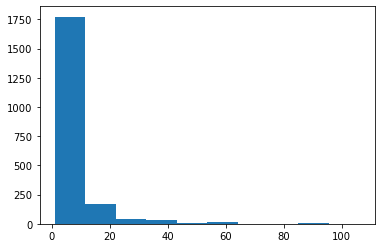

In [82]:
plt.hist(product_by_cnt); plt.show() # 대부분 1년 동안 20번 이내 방송

In [83]:
c_product = product_by_cnt[product_by_cnt>40]
print(c_product) # 40번 이상 방송된 제품 번호 확인
# -> 가구, 가전, 주방, 농수축(간고등어, 쥐포, 갑오징어 등), 이미용(화장품세트), 잡화(백팩)

p_code
200014     84
200197     46
200236     66
200265     59
200269     59
200465     91
200489     60
200533     91
200556     60
200685     46
200731     50
200732     50
200733     50
200864    106
200868     94
201376     59
201377     59
201378     59
201379     59
201479     54
202239     46
202467     63
202470     63
202473     63
202480     63
202484     42
202510     73
dtype: int64


- 일-상품별로 한 row로 만든 데이터(df4_sub)와 상품 및 일자정보 merge 

In [99]:
product_info = df4[['m_code', 'p_code', 'p_date', 'p_name', 'p_category', 'p_price', 'date']]
product_info.drop_duplicates(['m_code', 'p_code', 'p_date'], keep='first').head(10)

,m_code,p_code,p_date,p_name,p_category,p_price,date
0,100346,201072,2019-01-01,테이트 남성 셀린니트3종,의류,39900,2019-01-01 06:00:00
1,100346,201079,2019-01-01,테이트 여성 셀린니트3종,의류,39900,2019-01-01 06:00:00
6,100305,200974,2019-01-01,오모떼 레이스 파운데이션 브라,속옷,59000,2019-01-01 07:00:00
9,100808,202377,2019-01-01,CERINI by PAT 남성 소프트 기모 릴렉스팬츠,의류,59900,2019-01-01 08:00:00
12,100816,202404,2019-01-01,보코 리버시블 무스탕,의류,79000,2019-01-01 09:00:00
15,100809,202395,2019-01-01,CERINI by PAT 남성 풀패키지 기모니트 3종,의류,79900,2019-01-01 10:00:00
18,100664,201999,2019-01-01,크로커다일 The 편안한 코튼 브라팬티 4세트,속옷,69900,2019-01-01 11:00:00
20,100088,200236,2019-01-01,에코라믹 통주물 스톤 냄비세트,주방,60900,2019-01-01 12:00:00
23,100305,200970,2019-01-01,오모떼 360도 텐션업 레이스 패키지 시즌4,속옷,109000,2019-01-01 13:00:00
25,100377,201220,2019-01-01,그렉노먼 남성 구스다운 롱 벤치코트,의류,119000,2019-01-01 14:00:00
